## tl;dr

* Shifting the polygon away from origin introduces error in area computation in the georust implementation.
  * Some of this error is unavoidable with any implementation due to use of floating point arithmetic.
  * For georust, in this example, the error is ~1 when shifted 1e17 away from origin in a direction not aligned to the x/y axis. At that point, the area computation results in the value of 0.
* For a naive implementation, the error is huge (relative error up to 1e14 when shifted 1e17 away from origin).
  * Error remains small when shifted along x or y axis.

# Prerequisites

Generate data:

```sh
cd explore_geo
cargo run --example area_numerical_stability > ../analysis/area_numerical_stability/data.json
```

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn-whitegrid')


In [3]:
def _flatten(series):
    flattened = []
    for entry in series:
        angle = entry['angle']
        for datum in entry['data']:
            datum['angle'] = angle
            flattened.append(datum)
    return flattened

with open('./data.json') as f:
    data = _flatten(json.loads(f.read()))
df = pd.json_normalize(data)

print(df.describe())


              shift  geo_shift_relative_error       angle  geo.original  \
count  3.200000e+02              3.200000e+02  320.000000    320.000000   
mean   4.323456e+17              1.230662e-01    0.785398    293.892626   
std    1.952607e+18              3.172078e-01    0.556230      0.000000   
min    1.500000e+00              0.000000e+00    0.000000    293.892626   
25%    8.601600e+04              1.456419e-13    0.392699    293.892626   
50%    4.831838e+09              4.066990e-09    0.785398    293.892626   
75%    2.638828e+14              6.981555e-04    1.178097    293.892626   
max    1.383506e+19              1.000000e+00    1.570796    293.892626   

       geo.shifted  geos.original  geos.shifted  naive.original  \
count   320.000000     320.000000    320.000000      320.000000   
mean    262.912068     293.892626    262.912068      293.892626   
std      95.080734       0.000000     95.080734        0.000000   
min       0.000000     293.892626      0.000000      293

<AxesSubplot:title={'center':'Relative error in naive computation of area, series by bearing of translation'}, xlabel='shift'>

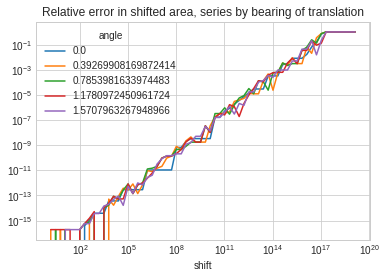

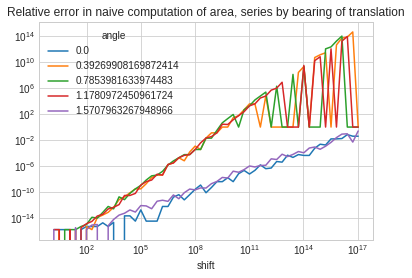

In [5]:
series = df.pivot(index='shift', columns='angle', values=['geo_shift_relative_error', 'naive_geo_relative_error.shifted'])
series.plot(y='geo_shift_relative_error', kind='line', logx=True, logy=True, title='Relative error in shifted area, series by bearing of translation')
series.plot(y='naive_geo_relative_error.shifted', kind='line', logx=True, logy=True, title='Relative error in naive computation of area, series by bearing of translation')

